In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Mall_customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [7]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

df_wcss =  pd.DataFrame(zip(range(1,20), wcss), columns=['k', 'wcss'])

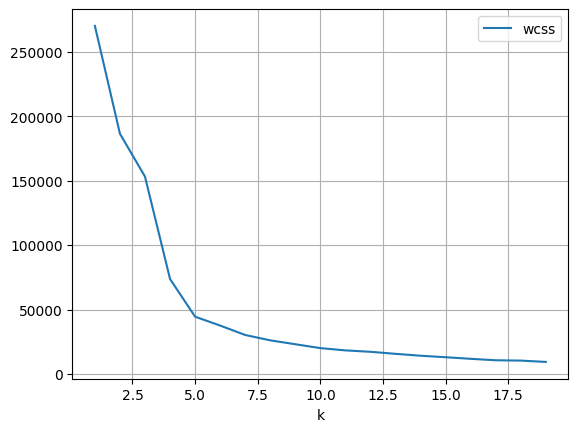

In [8]:
df_wcss.plot.line('k', 'wcss')
plt.grid()

In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(data)

KMeans(n_clusters=5)

In [10]:
y = kmeans.predict(data)
kmeans.cluster_centers_

array([[86.53846154, 82.12820513],
       [55.0875    , 49.7125    ],
       [87.75      , 17.58333333],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

In [11]:
df_pred = df.copy()
df_pred['cluster'] = y

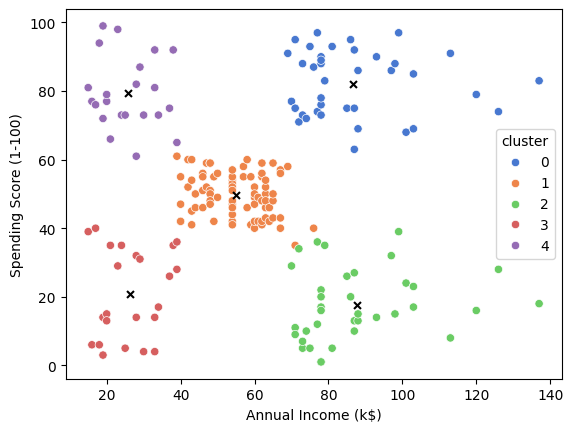

In [12]:
import seaborn as sns
centroids = kmeans.cluster_centers_
sns.scatterplot(x = 'Annual Income (k$)', y ='Spending Score (1-100)', data = df_pred, hue = 'cluster', palette='muted');
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=25, c='black')

In [24]:
## Silhouette score

from sklearn.metrics import silhouette_score
ss = silhouette_score(data, df_pred['cluster'])
ss

0.5534496268497305

### Using Gender as well

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [14]:
# ! pip install plotly

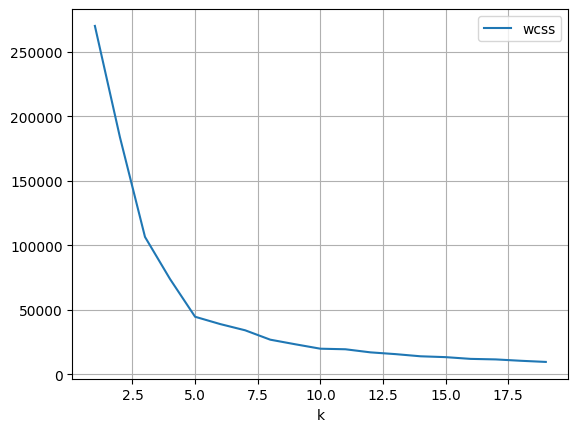

In [20]:
data = df[['Gender', 'Annual Income (k$)', 'Spending Score (1-100)']]
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

df_wcss =  pd.DataFrame(zip(range(1,20), wcss), columns=['k', 'wcss'])
df_wcss.plot.line('k', 'wcss')
plt.grid()

In [21]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(data)

y = kmeans.predict(data)
kmeans.cluster_centers_
df_pred = df.copy()
df_pred['cluster'] = y
import plotly.express as px
fig = px.scatter_3d(df_pred,
                   x = 'Annual Income (k$)',
                   y = 'Spending Score (1-100)',
                   z = 'Gender',
                   color='cluster')
fig.show()